# 1. Kütüphaneleri İçe Aktar ve Yükle

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2.

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Çizim yardımcı programları

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # RENK DÖNÜŞÜMÜ BGR 2 RGB
    image.flags.writeable = False                  # Resim artık yazılabilir değil
    results = model.process(image)                 # Tahmin etmek
    image.flags.writeable = True                   # Resim artık yazılabilir
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # RENK DÖNÜŞÜMÜ BGR 2 RGB
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Yüz bağlantılarını çizin
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Poz bağlantıları çizin
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Sol taraftaki bağlantıları çizin
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Sağ taraftaki bağlantıları çizin

In [5]:
def draw_styled_landmarks(image, results):
    # Yüz bağlantılarını çizin
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Poz bağlantıları çizin
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Sol taraftaki bağlantıları çizin
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Sağ taraftaki bağlantıları çizin
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Mediapipe modelini ayarla
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Kamerayı oku
        ret, frame = cap.read()

        # Tespitler yapın
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Yer işaretleri çizin
        draw_styled_landmarks(image, results)

        # Ekrana göster
        cv2.imshow('OpenCV Feed', image)

        # Okumadan çıkmak için
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

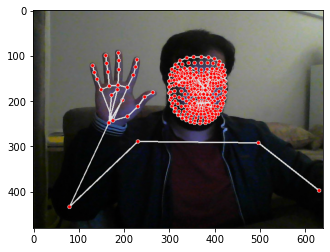

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Anahtar Nokta Değerlerini Çıkarın

In [11]:
len(results.right_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.59399384,  0.36844942, -1.06752443, ...,  0.20624883,
        0.25504661, -0.04060209])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.59399384,  0.36844942, -1.06752443, ...,  0.20624883,
        0.25504661, -0.04060209])

# 4. Koleksiyon için Kurulum Klasörleri

In [20]:

DATA_PATH = os.path.join('MP_Data') 

# Tespit etmeye çalıştığımız eylemler
actions = np.array(['merhaba', 'tesekkurler', 'seniseviyorum'])

# Otuz video değerinde veri
no_sequences = 30

# Videolar 30 kare uzunluğunda olacak
sequence_length = 30

In [21]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Eğitim ve Test için Anahtar Nokta Değerlerini Toplayın

In [22]:
cap = cv2.VideoCapture(0)

# min_detection_confidence: Kişi tespit modelinden tespitin başarılı olarak 
#                           kabul edilmesi gereken minimum güven değerini 
#                           belirtmek için kullanılır. [0.0 - 1.0] içinde bir değer belirtebilir. 
#                           Varsayılan değer 0.5'tir.

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Eylemler arasında geçiş yapın
    for action in actions:
        # Videolar olarak adlandırılan diziler arasında döngü yapın
        for sequence in range(no_sequences):
           # Video uzunluğu, yani dizi uzunluğu boyunca döngü
            for frame_num in range(sequence_length):

                # Kamerayı oku
                ret, frame = cap.read()

                # Tespitler yap
                image, results = mediapipe_detection(frame, holistic)

                # Yer işaretleri çizin
                draw_styled_landmarks(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'KOLEKSİYONA BASLIYOR', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    
                    cv2.putText(image, '{} kelimesinin {} ornegi isleniyor.'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                   # Ekrana göster
                    cv2.imshow('İsaret Dili Tanima', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, '{} kelimesinin {} ornegi isleniyor.'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Ekrana göster
                    cv2.imshow('İsaret Dili Tanima', image)
                
              # YENİ Önemli noktaları dışa aktar
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

        
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [23]:
cap.release()
cv2.destroyAllWindows()

# 6. Verileri Ön İşleme Alın ve Etiketler ve Özellikler Oluşturun

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [25]:
label_map = {label:num for num, label in enumerate(actions)}

In [26]:
label_map

{'merhaba': 0, 'tesekkurler': 1, 'seniseviyorum': 2}

In [27]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [29]:
np.array(labels).shape

(90,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(90, 30, 1662)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [59]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 418ms/step - loss: 1.2086 - categorical_accuracy: 0.3326
Epoch 2/2000
3/3 [==============================] - 0s 135ms/step - loss: 2.3112 - categorical_accuracy: 0.2818
Epoch 3/2000
3/3 [==============================] - 0s 155ms/step - loss: 1.0992 - categorical_accuracy: 0.5009
Epoch 4/2000
3/3 [==============================] - 1s 181ms/step - loss: 1.0781 - categorical_accuracy: 0.3698
Epoch 5/2000
3/3 [==============================] - 0s 150ms/step - loss: 2.5523 - categorical_accuracy: 0.3405
Epoch 6/2000
3/3 [==============================] - 0s 144ms/step - loss: 5.5266 - categorical_accuracy: 0.3679
Epoch 7/2000
3/3 [==============================] - 1s 214ms/step - loss: 17.9296 - categorical_accuracy: 0.3151
Epoch 8/2000
3/3 [==============================] - 1s 256ms/step - loss: 17.7078 - categorical_accuracy: 0.3347
Epoch 9/2000
3/3 [==============================] - 1s 198ms/step - loss: 21.2767 - categorical_accura

3/3 [==============================] - 0s 125ms/step - loss: 2.6836 - categorical_accuracy: 0.3229
Epoch 74/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.0170 - categorical_accuracy: 0.4912
Epoch 75/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.5497 - categorical_accuracy: 0.3797
Epoch 76/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.4939 - categorical_accuracy: 0.5245
Epoch 77/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.2978 - categorical_accuracy: 0.4188
Epoch 78/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0464 - categorical_accuracy: 0.4521
Epoch 79/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0540 - categorical_accuracy: 0.5500
Epoch 80/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.9898 - categorical_accuracy: 0.6086
Epoch 81/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.8359 - categorical_accuracy: 0.56

3/3 [==============================] - 0s 108ms/step - loss: 0.6276 - categorical_accuracy: 0.6967
Epoch 146/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.5757 - categorical_accuracy: 0.7162
Epoch 147/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.7649 - categorical_accuracy: 0.6105
Epoch 148/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.6267 - categorical_accuracy: 0.7025
Epoch 149/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.7228 - categorical_accuracy: 0.5519
Epoch 150/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.6868 - categorical_accuracy: 0.6809
Epoch 151/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.5710 - categorical_accuracy: 0.7397
Epoch 152/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.5912 - categorical_accuracy: 0.7378
Epoch 153/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.5907 - categorical_accuracy: 0

3/3 [==============================] - 0s 111ms/step - loss: 0.5132 - categorical_accuracy: 0.8179
Epoch 218/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.5332 - categorical_accuracy: 0.7320
Epoch 219/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6101 - categorical_accuracy: 0.7398
Epoch 220/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.4722 - categorical_accuracy: 0.8238
Epoch 221/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5932 - categorical_accuracy: 0.7104
Epoch 222/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.8747 - categorical_accuracy: 0.5479
Epoch 223/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.6478 - categorical_accuracy: 0.7103
Epoch 224/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.7776 - categorical_accuracy: 0.6320
Epoch 225/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6004 - categorical_accura

3/3 [==============================] - 0s 102ms/step - loss: 0.4592 - categorical_accuracy: 0.8435
Epoch 290/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.4506 - categorical_accuracy: 0.8904
Epoch 291/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.4677 - categorical_accuracy: 0.8357
Epoch 292/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.5010 - categorical_accuracy: 0.8258
Epoch 293/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.4726 - categorical_accuracy: 0.8063
Epoch 294/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.7296 - categorical_accuracy: 0.6869
Epoch 295/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.4649 - categorical_accuracy: 0.8846
Epoch 296/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.4223 - categorical_accuracy: 0.8846
Epoch 297/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5163 - categorical_accuracy:

3/3 [==============================] - 0s 109ms/step - loss: 0.3620 - categorical_accuracy: 0.9041
Epoch 361/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4377 - categorical_accuracy: 0.7984
Epoch 362/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.4577 - categorical_accuracy: 0.7868
Epoch 363/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.2431 - categorical_accuracy: 0.9412
Epoch 364/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3482 - categorical_accuracy: 0.8787
Epoch 365/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.3612 - categorical_accuracy: 0.8513
Epoch 366/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3296 - categorical_accuracy: 0.9198
Epoch 367/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.3189 - categorical_accuracy: 0.8826
Epoch 368/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.3618 - categorical_accura

Epoch 432/2000
3/3 [==============================] - 1s 138ms/step - loss: 0.2951 - categorical_accuracy: 0.8963
Epoch 433/2000
3/3 [==============================] - 1s 251ms/step - loss: 0.4129 - categorical_accuracy: 0.8337
Epoch 434/2000
3/3 [==============================] - 0s 145ms/step - loss: 0.3069 - categorical_accuracy: 0.8903
Epoch 435/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.2167 - categorical_accuracy: 0.9608
Epoch 436/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.3306 - categorical_accuracy: 0.8259
Epoch 437/2000
3/3 [==============================] - 1s 180ms/step - loss: 0.2117 - categorical_accuracy: 0.9413
Epoch 438/2000
3/3 [==============================] - 1s 166ms/step - loss: 0.1768 - categorical_accuracy: 0.9452
Epoch 439/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.2907 - categorical_accuracy: 0.8806
Epoch 440/2000
3/3 [==============================] - 1s 165ms/step - loss: 0.6578 - cat

3/3 [==============================] - 0s 101ms/step - loss: 0.0816 - categorical_accuracy: 0.9824
Epoch 504/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0621 - categorical_accuracy: 0.9902
Epoch 505/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0535 - categorical_accuracy: 0.9902
Epoch 506/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.0523 - categorical_accuracy: 0.9902
Epoch 507/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.0501 - categorical_accuracy: 0.9941
Epoch 508/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0549 - categorical_accuracy: 0.9902
Epoch 509/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0532 - categorical_accuracy: 0.9902
Epoch 510/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.0680 - categorical_accuracy: 0.9824
Epoch 511/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0480 - categorical_accurac

3/3 [==============================] - 0s 109ms/step - loss: 0.0685 - categorical_accuracy: 0.9843
Epoch 576/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.0862 - categorical_accuracy: 0.9726
Epoch 577/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0932 - categorical_accuracy: 0.9726
Epoch 578/2000
3/3 [==============================] - 0s 175ms/step - loss: 0.0941 - categorical_accuracy: 0.9648
Epoch 579/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.0904 - categorical_accuracy: 0.9628
Epoch 580/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0681 - categorical_accuracy: 0.9843
Epoch 581/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0580 - categorical_accuracy: 0.9843
Epoch 582/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0652 - categorical_accuracy: 0.9882
Epoch 583/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0889 - categorical_accura

3/3 [==============================] - 0s 99ms/step - loss: 0.0564 - categorical_accuracy: 0.9824
Epoch 648/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0293 - categorical_accuracy: 0.9902
Epoch 649/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0329 - categorical_accuracy: 0.9765
Epoch 650/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0280 - categorical_accuracy: 0.9941
Epoch 651/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0344 - categorical_accuracy: 0.9824
Epoch 652/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0329 - categorical_accuracy: 0.9902
Epoch 653/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0413 - categorical_accuracy: 0.9902
Epoch 654/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0471 - categorical_accuracy: 0.9824
Epoch 655/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0399 - categorical_accuracy: 

3/3 [==============================] - 0s 116ms/step - loss: 0.0778 - categorical_accuracy: 0.9765
Epoch 720/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0605 - categorical_accuracy: 0.9804
Epoch 721/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0987 - categorical_accuracy: 0.9667
Epoch 722/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0795 - categorical_accuracy: 0.9824
Epoch 723/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0660 - categorical_accuracy: 0.9902
Epoch 724/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0930 - categorical_accuracy: 0.9824
Epoch 725/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.0668 - categorical_accuracy: 0.9824
Epoch 726/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0388 - categorical_accuracy: 0.9941
Epoch 727/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.0340 - categorical_accurac

3/3 [==============================] - 0s 102ms/step - loss: 38.4635 - categorical_accuracy: 0.3386
Epoch 791/2000
3/3 [==============================] - 0s 107ms/step - loss: 30.1899 - categorical_accuracy: 0.3210
Epoch 792/2000
3/3 [==============================] - 0s 92ms/step - loss: 20.5975 - categorical_accuracy: 0.3541
Epoch 793/2000
3/3 [==============================] - 0s 99ms/step - loss: 23.5086 - categorical_accuracy: 0.2857
Epoch 794/2000
3/3 [==============================] - 0s 106ms/step - loss: 18.5933 - categorical_accuracy: 0.3229
Epoch 795/2000
3/3 [==============================] - 0s 111ms/step - loss: 40.8209 - categorical_accuracy: 0.3190
Epoch 796/2000
3/3 [==============================] - 0s 100ms/step - loss: 31.4125 - categorical_accuracy: 0.3327
Epoch 797/2000
3/3 [==============================] - 0s 107ms/step - loss: 29.7035 - categorical_accuracy: 0.3288
Epoch 798/2000
3/3 [==============================] - 1s 164ms/step - loss: 18.3342 - categorical

3/3 [==============================] - 0s 103ms/step - loss: 21.3756 - categorical_accuracy: 0.3229
Epoch 862/2000
3/3 [==============================] - 0s 124ms/step - loss: 21.7023 - categorical_accuracy: 0.3288
Epoch 863/2000
3/3 [==============================] - 0s 107ms/step - loss: 26.9086 - categorical_accuracy: 0.2975
Epoch 864/2000
3/3 [==============================] - 0s 104ms/step - loss: 23.0142 - categorical_accuracy: 0.3229
Epoch 865/2000
3/3 [==============================] - 0s 120ms/step - loss: 26.4639 - categorical_accuracy: 0.3111
Epoch 866/2000
3/3 [==============================] - 0s 100ms/step - loss: 23.4629 - categorical_accuracy: 0.3425
Epoch 867/2000
3/3 [==============================] - 1s 227ms/step - loss: 8.1461 - categorical_accuracy: 0.3483
Epoch 868/2000
3/3 [==============================] - 1s 170ms/step - loss: 6.5067 - categorical_accuracy: 0.3640
Epoch 869/2000
3/3 [==============================] - 0s 143ms/step - loss: 16.3541 - categorical

3/3 [==============================] - 0s 154ms/step - loss: 8.7033 - categorical_accuracy: 0.3405
Epoch 933/2000
3/3 [==============================] - 0s 140ms/step - loss: 9.4682 - categorical_accuracy: 0.3249
Epoch 934/2000
3/3 [==============================] - 1s 180ms/step - loss: 10.9413 - categorical_accuracy: 0.3542
Epoch 935/2000
3/3 [==============================] - 1s 205ms/step - loss: 9.6005 - categorical_accuracy: 0.3385
Epoch 936/2000
3/3 [==============================] - 1s 185ms/step - loss: 14.1988 - categorical_accuracy: 0.2994
Epoch 937/2000
3/3 [==============================] - 0s 158ms/step - loss: 5.5052 - categorical_accuracy: 0.3307
Epoch 938/2000
3/3 [==============================] - 0s 140ms/step - loss: 8.1222 - categorical_accuracy: 0.4461
Epoch 939/2000
3/3 [==============================] - 0s 136ms/step - loss: 10.7803 - categorical_accuracy: 0.3404
Epoch 940/2000
3/3 [==============================] - 0s 160ms/step - loss: 10.9218 - categorical_ac

3/3 [==============================] - 0s 124ms/step - loss: 5.7209 - categorical_accuracy: 0.3229
Epoch 1004/2000
3/3 [==============================] - 0s 105ms/step - loss: 5.7940 - categorical_accuracy: 0.2525
Epoch 1005/2000
3/3 [==============================] - 0s 114ms/step - loss: 6.4296 - categorical_accuracy: 0.3483
Epoch 1006/2000
3/3 [==============================] - 0s 127ms/step - loss: 8.0356 - categorical_accuracy: 0.3131
Epoch 1007/2000
3/3 [==============================] - 0s 107ms/step - loss: 7.4490 - categorical_accuracy: 0.3757
Epoch 1008/2000
3/3 [==============================] - 0s 103ms/step - loss: 4.6515 - categorical_accuracy: 0.4676
Epoch 1009/2000
3/3 [==============================] - 0s 117ms/step - loss: 5.7885 - categorical_accuracy: 0.2974
Epoch 1010/2000
3/3 [==============================] - 0s 115ms/step - loss: 3.7737 - categorical_accuracy: 0.2857
Epoch 1011/2000
3/3 [==============================] - 0s 109ms/step - loss: 3.0619 - categorica

3/3 [==============================] - 0s 103ms/step - loss: 6.2661 - categorical_accuracy: 0.3307
Epoch 1075/2000
3/3 [==============================] - 0s 108ms/step - loss: 6.4773 - categorical_accuracy: 0.3386
Epoch 1076/2000
3/3 [==============================] - 0s 107ms/step - loss: 4.5336 - categorical_accuracy: 0.4050
Epoch 1077/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.6883 - categorical_accuracy: 0.2740
Epoch 1078/2000
3/3 [==============================] - 0s 115ms/step - loss: 3.3070 - categorical_accuracy: 0.3542
Epoch 1079/2000
3/3 [==============================] - 0s 101ms/step - loss: 2.7724 - categorical_accuracy: 0.4012
Epoch 1080/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.1715 - categorical_accuracy: 0.4442
Epoch 1081/2000
3/3 [==============================] - 0s 123ms/step - loss: 5.1636 - categorical_accuracy: 0.3307
Epoch 1082/2000
3/3 [==============================] - 0s 99ms/step - loss: 3.8482 - categorical

3/3 [==============================] - 0s 119ms/step - loss: 5.6494 - categorical_accuracy: 0.3483
Epoch 1146/2000
3/3 [==============================] - 0s 120ms/step - loss: 7.3724 - categorical_accuracy: 0.3797
Epoch 1147/2000
3/3 [==============================] - 0s 124ms/step - loss: 7.8303 - categorical_accuracy: 0.3503
Epoch 1148/2000
3/3 [==============================] - 0s 134ms/step - loss: 4.5724 - categorical_accuracy: 0.3366
Epoch 1149/2000
3/3 [==============================] - 0s 104ms/step - loss: 6.8525 - categorical_accuracy: 0.3699
Epoch 1150/2000
3/3 [==============================] - 0s 108ms/step - loss: 6.3244 - categorical_accuracy: 0.3347
Epoch 1151/2000
3/3 [==============================] - 0s 134ms/step - loss: 6.2338 - categorical_accuracy: 0.3562
Epoch 1152/2000
3/3 [==============================] - 0s 112ms/step - loss: 5.4528 - categorical_accuracy: 0.3797
Epoch 1153/2000
3/3 [==============================] - 0s 103ms/step - loss: 4.8832 - categorica

Epoch 1216/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.4162 - categorical_accuracy: 0.2896
Epoch 1217/2000
3/3 [==============================] - 0s 119ms/step - loss: 2.7550 - categorical_accuracy: 0.3366
Epoch 1218/2000
3/3 [==============================] - 0s 135ms/step - loss: 3.9823 - categorical_accuracy: 0.4775
Epoch 1219/2000
3/3 [==============================] - 0s 140ms/step - loss: 4.0269 - categorical_accuracy: 0.3581
Epoch 1220/2000
3/3 [==============================] - 0s 104ms/step - loss: 4.1444 - categorical_accuracy: 0.4051
Epoch 1221/2000
3/3 [==============================] - 0s 122ms/step - loss: 4.2409 - categorical_accuracy: 0.3796
Epoch 1222/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.9479 - categorical_accuracy: 0.3581
Epoch 1223/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.3452 - categorical_accuracy: 0.3894
Epoch 1224/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.1

3/3 [==============================] - 0s 125ms/step - loss: 2.0844 - categorical_accuracy: 0.4227
Epoch 1288/2000
3/3 [==============================] - 1s 167ms/step - loss: 2.5146 - categorical_accuracy: 0.3777
Epoch 1289/2000
3/3 [==============================] - 0s 119ms/step - loss: 4.3088 - categorical_accuracy: 0.3738
Epoch 1290/2000
3/3 [==============================] - 0s 121ms/step - loss: 2.9994 - categorical_accuracy: 0.3542
Epoch 1291/2000
3/3 [==============================] - 0s 129ms/step - loss: 2.3985 - categorical_accuracy: 0.3796
Epoch 1292/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.7761 - categorical_accuracy: 0.4461
Epoch 1293/2000
3/3 [==============================] - 0s 128ms/step - loss: 2.5413 - categorical_accuracy: 0.4247
Epoch 1294/2000
3/3 [==============================] - 0s 135ms/step - loss: 2.8751 - categorical_accuracy: 0.3914
Epoch 1295/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.8527 - categorica

3/3 [==============================] - 0s 122ms/step - loss: 4.8720 - categorical_accuracy: 0.2290
Epoch 1359/2000
3/3 [==============================] - 0s 107ms/step - loss: 6.2815 - categorical_accuracy: 0.2936
Epoch 1360/2000
3/3 [==============================] - 0s 112ms/step - loss: 3.2533 - categorical_accuracy: 0.3463
Epoch 1361/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.0839 - categorical_accuracy: 0.4071
Epoch 1362/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.8381 - categorical_accuracy: 0.3601
Epoch 1363/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.3260 - categorical_accuracy: 0.3777
Epoch 1364/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.2985 - categorical_accuracy: 0.3405
Epoch 1365/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.7074 - categorical_accuracy: 0.3327
Epoch 1366/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.1967 - categorica

3/3 [==============================] - 0s 162ms/step - loss: 2.8199 - categorical_accuracy: 0.3777
Epoch 1430/2000
3/3 [==============================] - 0s 132ms/step - loss: 2.0070 - categorical_accuracy: 0.4579
Epoch 1431/2000
3/3 [==============================] - 0s 151ms/step - loss: 1.8942 - categorical_accuracy: 0.4638
Epoch 1432/2000
3/3 [==============================] - 0s 140ms/step - loss: 2.0245 - categorical_accuracy: 0.2369
Epoch 1433/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.5747 - categorical_accuracy: 0.4051
Epoch 1434/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.1609 - categorical_accuracy: 0.2290
Epoch 1435/2000
3/3 [==============================] - 0s 110ms/step - loss: 4.0951 - categorical_accuracy: 0.3483
Epoch 1436/2000
3/3 [==============================] - 0s 159ms/step - loss: 3.6879 - categorical_accuracy: 0.3268
Epoch 1437/2000
3/3 [==============================] - 0s 117ms/step - loss: 2.9164 - categorica

3/3 [==============================] - 0s 151ms/step - loss: 2.9694 - categorical_accuracy: 0.3933
Epoch 1501/2000
3/3 [==============================] - 0s 147ms/step - loss: 3.9930 - categorical_accuracy: 0.3307
Epoch 1502/2000
3/3 [==============================] - 0s 155ms/step - loss: 2.5633 - categorical_accuracy: 0.3679
Epoch 1503/2000
3/3 [==============================] - 0s 130ms/step - loss: 2.5893 - categorical_accuracy: 0.3738
Epoch 1504/2000
3/3 [==============================] - 1s 171ms/step - loss: 2.2518 - categorical_accuracy: 0.3954
Epoch 1505/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.5441 - categorical_accuracy: 0.4168
Epoch 1506/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.2477 - categorical_accuracy: 0.3503
Epoch 1507/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.6942 - categorical_accuracy: 0.3131
Epoch 1508/2000
3/3 [==============================] - 1s 162ms/step - loss: 1.9869 - categorica

3/3 [==============================] - 0s 117ms/step - loss: 3.6523 - categorical_accuracy: 0.3444
Epoch 1572/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.5061 - categorical_accuracy: 0.3465
Epoch 1573/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.4547 - categorical_accuracy: 0.3757
Epoch 1574/2000
3/3 [==============================] - 0s 172ms/step - loss: 1.4066 - categorical_accuracy: 0.3640
Epoch 1575/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.4509 - categorical_accuracy: 0.3444
Epoch 1576/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.2589 - categorical_accuracy: 0.3992
Epoch 1577/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.2867 - categorical_accuracy: 0.3483
Epoch 1578/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.6969 - categorical_accuracy: 0.4521
Epoch 1579/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.5434 - categorica

3/3 [==============================] - 0s 115ms/step - loss: 2.6784 - categorical_accuracy: 0.4011
Epoch 1643/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.0389 - categorical_accuracy: 0.3913
Epoch 1644/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.5907 - categorical_accuracy: 0.3327
Epoch 1645/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.4225 - categorical_accuracy: 0.3601
Epoch 1646/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.4765 - categorical_accuracy: 0.3366
Epoch 1647/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.2894 - categorical_accuracy: 0.4030
Epoch 1648/2000
3/3 [==============================] - 0s 101ms/step - loss: 2.2431 - categorical_accuracy: 0.3797
Epoch 1649/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.7218 - categorical_accuracy: 0.4208
Epoch 1650/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.5942 - categorica

3/3 [==============================] - 0s 105ms/step - loss: 1.2027 - categorical_accuracy: 0.4130
Epoch 1714/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.1007 - categorical_accuracy: 0.4951
Epoch 1715/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.8143 - categorical_accuracy: 0.5049
Epoch 1716/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.6499 - categorical_accuracy: 0.5205
Epoch 1717/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.4252 - categorical_accuracy: 0.5402
Epoch 1718/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.3090 - categorical_accuracy: 0.4599
Epoch 1719/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.3165 - categorical_accuracy: 0.3994
Epoch 1720/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.5064 - categorical_accuracy: 0.4481
Epoch 1721/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.2219 - categorica

3/3 [==============================] - 0s 113ms/step - loss: 2.0278 - categorical_accuracy: 0.3659
Epoch 1785/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.7773 - categorical_accuracy: 0.4031
Epoch 1786/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.7333 - categorical_accuracy: 0.4032
Epoch 1787/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.7832 - categorical_accuracy: 0.4187
Epoch 1788/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.7018 - categorical_accuracy: 0.4051
Epoch 1789/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.7092 - categorical_accuracy: 0.5362
Epoch 1790/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.6592 - categorical_accuracy: 0.3934
Epoch 1791/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.4114 - categorical_accuracy: 0.4247
Epoch 1792/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.3257 - categorical

3/3 [==============================] - 0s 124ms/step - loss: 2.4198 - categorical_accuracy: 0.3953
Epoch 1856/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.7544 - categorical_accuracy: 0.4091
Epoch 1857/2000
3/3 [==============================] - 0s 106ms/step - loss: 2.1155 - categorical_accuracy: 0.3953
Epoch 1858/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.1822 - categorical_accuracy: 0.4482
Epoch 1859/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.2212 - categorical_accuracy: 0.4971
Epoch 1860/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.4616 - categorical_accuracy: 0.4932
Epoch 1861/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.1047 - categorical_accuracy: 0.5773
Epoch 1862/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.3281 - categorical_accuracy: 0.5323
Epoch 1863/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.7145 - categorica

3/3 [==============================] - 0s 126ms/step - loss: 1.2330 - categorical_accuracy: 0.6732
Epoch 1927/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.9435 - categorical_accuracy: 0.6341
Epoch 1928/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.9745 - categorical_accuracy: 0.5852
Epoch 1929/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0523 - categorical_accuracy: 0.5500
Epoch 1930/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.8917 - categorical_accuracy: 0.6320
Epoch 1931/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.9584 - categorical_accuracy: 0.6203
Epoch 1932/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.9368 - categorical_accuracy: 0.6262
Epoch 1933/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.6872 - categorical_accuracy: 0.7045
Epoch 1934/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.7977 - categorica

3/3 [==============================] - 0s 109ms/step - loss: 2.0130 - categorical_accuracy: 0.4423
Epoch 1998/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.1224 - categorical_accuracy: 0.5284
Epoch 1999/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.3059 - categorical_accuracy: 0.5050
Epoch 2000/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.5684 - categorical_accuracy: 0.5597


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [41]:
res = model.predict(X_test)

In [42]:
actions[np.argmax(res[4])]

'tesekkurler'

In [43]:
actions[np.argmax(y_test[4])]

'seniseviyorum'

# 9. Save Weights

In [44]:
model.save('action.h5')

In [58]:
del model

In [60]:
model.load_weights('action.h5')

# 10. Karışıklık Matrisi ve Doğruluğu Kullanarak Değerlendirme

In [61]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [62]:
yhat = model.predict(X_test)

In [63]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [64]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[3, 1],
        [0, 1]],

       [[1, 1],
        [1, 2]]], dtype=int64)

In [65]:
accuracy_score(ytrue, yhat)

0.6

# 11. Gerçek Zamanlı Test

In [66]:
from scipy import stats

In [67]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

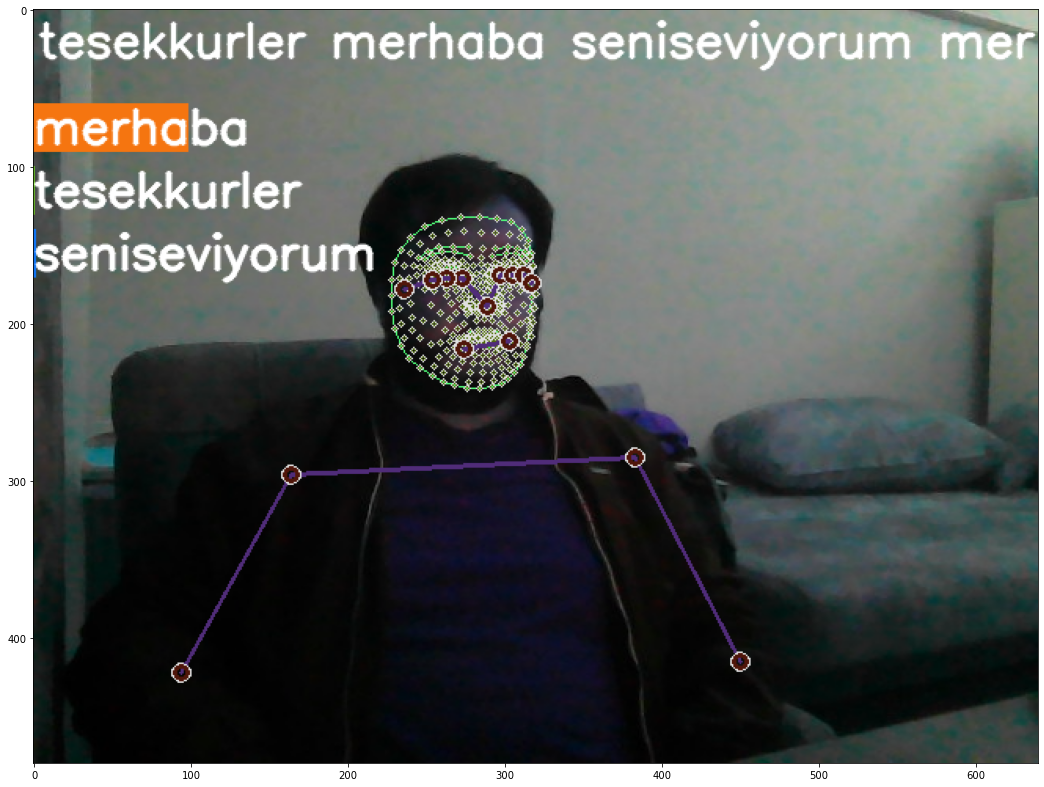

In [78]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [77]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        #cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
tesekkurler
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
seniseviyorum
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
merhaba
